First few rows of the dataset:
    Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 row

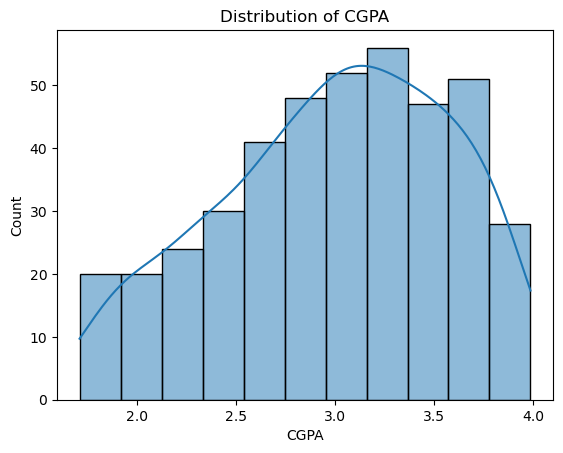

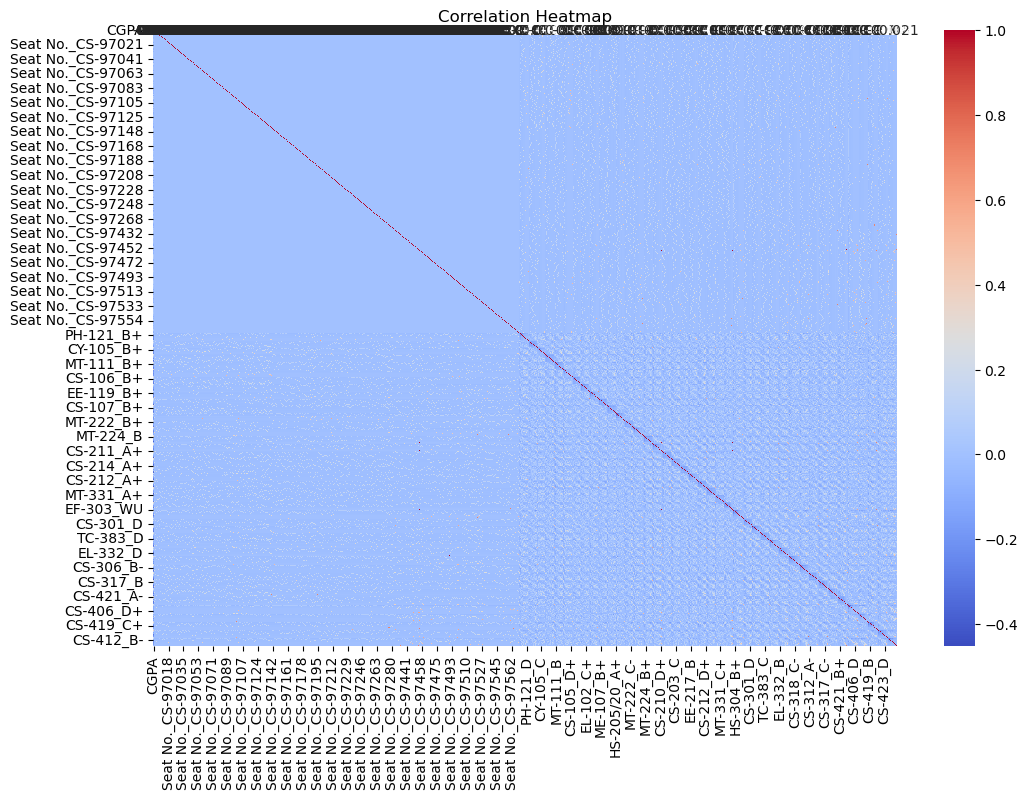

Linear Regression R2 Score: 0.978902203709087
Random Forest R2 Score: 0.8332266271943393
Linear Regression MSE: 0.0077497578777660685, R2: 0.978902203709087
Random Forest MSE: 0.06126010706904748, R2: 0.8332266271943393


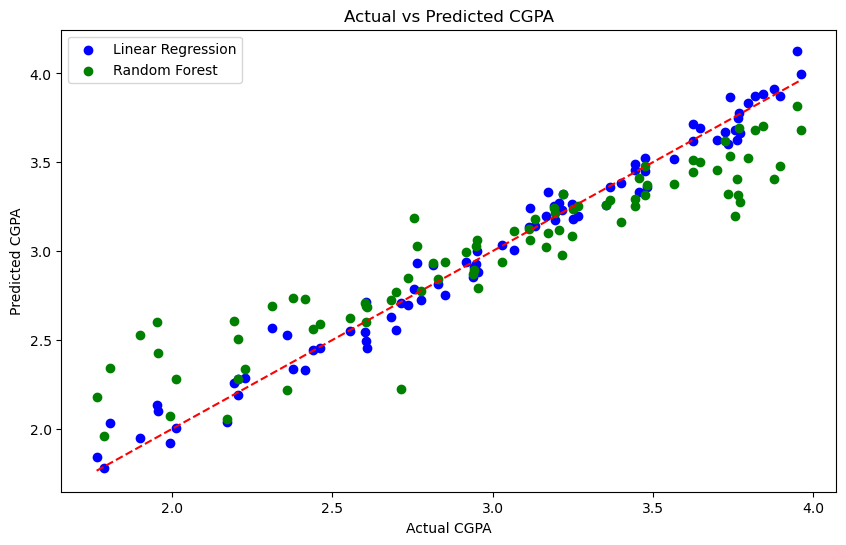

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset4/refs/heads/main/Grades.csv"
data = pd.read_csv(url)

# Inspecting the dataset
print("First few rows of the dataset:\n", data.head())
print("\nDataset info:\n")
print(data.info())

# Checking for missing values
print("\nMissing values:\n", data.isnull().sum())

# Drop missing values
data = data.dropna()

# Identifying non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Drop 'Seat No' if it's in the dataset, since it's not relevant
if 'Seat No' in data.columns:
    data = data.drop(columns=['Seat No'])

# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Exploratory Data Analysis (EDA)
# Plot the distribution of CGPA
sns.histplot(data['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split features and target variable
features = data.drop(columns=['CGPA'])
target = data['CGPA']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Training: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression R2 Score: {r2_score(y_test, y_pred_lr)}")

# Model Training: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf)}")

# Model Evaluation
# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}, R2: {r2_lr}")

# Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

# Visualization of Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs Predicted CGPA')
plt.legend()
plt.show()
